In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-08-05 10:21:54--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M  84.1MB/s    in 0.8s    

2024-08-05 10:21:55 (84.1 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("Data/")
zip_ref.close()

In [ ]:
#training and validation set directories
Main_dir = 'Data/cats_and_dogs_filtered'
train_dir = os.path.join(Main_dir, 'train')
validation_dir = os.path.join(Main_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
TRAINING_DIR = '/content/Data/cats_and_dogs_filtered/train'
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/content/Data/cats_and_dogs_filtered/validation'

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#https://muhammadrizwanmunawar.medium.com/image-classification-using-transfer-learning-vgg-16-2dc2221be34c# Import the VGG16 model
pre_trained_model = tf.keras.applications.VGG16(input_shape=(150, 150, 3), include_top=False, weights=None)
#Weight url : https://github.com/fchollet/deep-learning-models/blob/master/vgg16.py
pre_trained_model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')



In [ ]:
#https://muhammadrizwanmunawar.medium.com/image-classification-using-transfer-learning-vgg-16-2dc2221be34c
#freeze
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
#https://muhammadrizwanmunawar.medium.com/image-classification-using-transfer-learning-vgg-16-2dc2221be34c
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output


In [ ]:
#https://muhammadrizwanmunawar.medium.com/image-classification-using-transfer-learning-vgg-16-2dc2221be34c
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, outputs = x)


In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,910,017 (72.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Implement callback function to stop training
# when accuracy reaches ACCURACY_THRESHOLD
#https://towardsdatascience.com/neural-network-with-tensorflow-how-to-stop-training-using-callback-5c8d575c18a9
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('acc') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
callbacks = myCallback()
history = model.fit(train_generator,
                              epochs = 10,
                              validation_data = validation_generator,
                              verbose = 1,
                              callbacks= [callbacks])

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 679ms/step - acc: 0.5628 - loss: 0.9311 - val_acc: 0.7260 - val_loss: 0.5063
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 621ms/step - acc: 0.7320 - loss: 0.5199 - val_acc: 0.8350 - val_loss: 0.3735
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 648ms/step - acc: 0.7743 - loss: 0.4712 - val_acc: 0.7230 - val_loss: 0.5355
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 613ms/step - acc: 0.7714 - loss: 0.4668 - val_acc: 0.8600 - val_loss: 0.3196
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 713ms/step - acc: 0.8029 - loss: 0.4138 - val_acc: 0.8670 - val_loss: 0.3047


<Figure size 640x480 with 0 Axes>

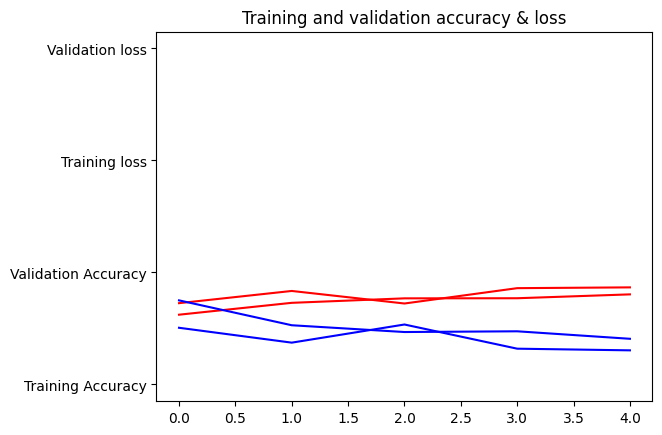

<Figure size 640x480 with 0 Axes>

In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
#adding val loss and training loss to the code
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'r', "Validation Accuracy")
plt.plot(epochs, loss, 'b', "Training loss")
plt.plot(epochs, val_loss, 'b', "Validation loss")
plt.title('Training and validation accuracy & loss')
plt.figure()

In [42]:
model_ev = model.evaluate(validation_generator)
print(model_ev)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - acc: 0.8512 - loss: 0.3206
[0.30474579334259033, 0.8669999837875366]


In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)  # Preprocess the input according to InceptionV3 requirements

    classes = model.predict(x)
    predicted_class_index = np.argmax(classes)  # Get the index of the class with the highest probability

    # Map class index to class label using the train_generator.class_indices dictionary
    predicted_class_label = [k for k, v in train_generator.class_indices.items() if v == predicted_class_index][0]

    print(f"{fn} is predicted as {predicted_class_label}")

Saving c6c45025-abe8-4f7d-be69-1b33566f107a.jpeg to c6c45025-abe8-4f7d-be69-1b33566f107a (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
c6c45025-abe8-4f7d-be69-1b33566f107a (1).jpeg is predicted as cats


In [ ]:
#https://medium.com/@vipinra79/image-classification-using-transfer-learning-with-inceptionv3-in-google-colab-d89c34ba438f
#edited by adding the accuracy for the predicted images .
import numpy as np
from google.colab import files
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)  # Preprocess the input according to InceptionV3 requirements

    classes = model.predict(x)
    predicted_class_index = np.argmax(classes)  # Get the index of the class with the highest probability
    accuracy = classes[0][predicted_class_index]

    # Map class index to class label using the train_generator.class_indices dictionary
    predicted_class_label = [k for k, v in train_generator.class_indices.items() if v == predicted_class_index][0]

    print(f"{fn} is predicted as {predicted_class_label} with an accuracy of {accuracy:.2f}")

Saving c6c45025-abe8-4f7d-be69-1b33566f107a.jpeg to c6c45025-abe8-4f7d-be69-1b33566f107a (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
c6c45025-abe8-4f7d-be69-1b33566f107a (2).jpeg is predicted as cats with an accuracy of 0.09
